# Home Exam 52002 - 2024-2025

#**Instructions**
* **Fill your ID Here:** [replace the bracketed text with your ID number]
* Work on the assignment and submit your solution *individually*. <br>
No sharing of information on the assignment is allowed between students.


* **Format:** Fill code, text explanations and output (figures, tables ..) in the designated places. <br>For some questions, the code you fill should run in this .ipynb notebook and generate the output automatically after running (e.g. in `google colab`). <br>For the Unix part you will need to run commands in other environments (Ubuntu) - in this case, just copy the commands and the relevant outputs in the designated text blocks.
Rename the solution file to 'HomeExam_52002_2045_25_[ID].ipynb' where [ID] should be replaced by your ID number.
* Submit your filled solution by Febuary 28th 23:59 your solution on moodle.


* **Data:** Some of the questions requires analyzing and manipulating data files. All the files required for the exam are located in the directory:
'/sci/home/orzuk/FinalExamBigData'
in Moriah.
You may copy them to your working directory in Moriah, to your personal computer or any other computing environment you use. You may need to unzip the files before using them.


* **Grading:**
*  There are overall $11$ questions in this home exam. Each question is worth $9$ points to your total grade. One additional point will be given for submitting  files with correct formats and file names. * **Note:** Points from your grade may be deducted for submitting wrong/missing parts of files OR if not submitting the complete generated/complied output.
* **Note:** Some parts of the code may take a long time  to run.
 Be patient. However, don't leave everything to run at the last minute but prepare in advance so that your entire solution runs and finishes on time.
* **Note**: Solutions with naive or inefficient implementations may reduce the score

###Submission Guidelines:


By the end of the exercise, please submit the following **four** files:


1. **Networks, Streaming, Unix, and Batch Task Processing:**  
   - Provide your solutions in both `.ipynb` (Jupyter Notebook) and `.html` formats. Submit after running all parts of the `.ipynb` notebook except the unix part , check that the outputs of each question were created and saved. For the unix part, copy the code and results manually to the `.ipynb` notebook.

2. **Spark Section:**  
   - Submit the fully executed Jupyter Notebook (`.ipynb`) with all expected outputs, after running it in the Databricks environment.
   - Include an `.html` export of the executed notebook displaying the outputs.  


Ensure that all submitted files are clearly labeled and display the required outputs where applicable.

* **Good luck!**


# Part 1: Unix

## Q1. Preprocessing using Unix
The file `network-review-Oregon.json` contains user reviews of different buisnesses (it is a sample from a full `review-Oregon.json` file).

a. Use Unix commands to generate a new file called `bipartite_network.txt'
containing a table from the file `network-review-Oregon.json`
The table should contain only the next columns:
`user_id,gmap_id_from,rating` separated by commmas

Finally, show all the rows in which the user-id is `100000837087364476756`

b. Use Unix commands and the file from (a.) to generate a new
`network-table.txt` containing one row for each pair of buisnesses (`gmap_id`) that were reviewed by the same user (`user_id`).  

The table should contain only the next columns:
`gmap_id_from,user_id,rating_from,gmap_id_to,rating_to` separated by commmas

You can split your process into multiple steps, creating intermediate CSV/TXT files and then merging them.

Finally, show all the rows in which the user-id is `100000837087364476756`

**Note:** If two different users rate the same two buisnesses, there should be separate rows for the ratings. In addition, the pair of buisnesses should appear twice in the two possible orders.
For example if user1 rated the two buisnesses as 3,4 and user2 rated them as 4,2, the following lines should be in your output file:
gmap_id1, user1, 3, gmap_id2, 4
gmap_id2, user1, 4, gmap_id1, 3
gmap_id1, user2, 4, gmap_id2, 2
gmap_id2, user2, 2, gmap_id1, 4

**Question 1 Shell Commands ($):**<br>

a.

```
zcat /sci/home/orzuk/BigDataMiningExam/network-review-Oregon.json.gz | jq -r '[.user_id, .gmap_id, .rating] | @csv' > bipartite_network.txt
grep '"100000837087364476756",' bipartite_network.txt
```

b.
```
awk -F, '
{
    key = $1 "_" $2  # Create a unique key: "user_id_gmap_id"
    ratings[key] = $3
    user_reviews[$1] = user_reviews[$1] "," $2  # Append business IDs for this user
} 
END {
    for (user in user_reviews) {
        split(user_reviews[user], businesses, ",")  # Convert list to array
        n = length(businesses)
        for (i = 2; i < n; i++) {  # Start at index 2 to skip leading comma
            for (j = i + 1; j <= n; j++) {  # Ensure i ≠ j and avoid duplicates
                key1 = user "_" businesses[i]
                key2 = user "_" businesses[j]

                # Print the pair in both orders
                print businesses[i] "," user "," ratings[key1] "," businesses[j] "," ratings[key2]
                print businesses[j] "," user "," ratings[key2] "," businesses[i] "," ratings[key1]
            }
        }
    }
}' bipartite_network.txt > network-table.txt
grep '"100000837087364476756",' network-table.txt
```

**Question 1 Shell Output ($):**<br>
a.
```
"100000837087364476756","0x54950a755cc35d8d:0x92d6d400144b2141",5
"100000837087364476756","0x54c17ff7bcaa7c31:0x2970a958143cc922",4
```

b.
```
"0x54950a755cc35d8d:0x92d6d400144b2141","100000837087364476756",5,"0x54c17ff7bcaa7c31:0x2970a958143cc922",4
"0x54c17ff7bcaa7c31:0x2970a958143cc922","100000837087364476756",4,"0x54950a755cc35d8d:0x92d6d400144b2141",5
```

## Q2. Batch Task Processing- Moriah

We want to calcaulte the total number of reviews and the average rating for each `gmap_id` of the full review file (`review-Oregon.json`)

Implement the following pipeline for this task:
1. Split the input file into five files, one for each rating from 1 to 5 (e.g., `rating_i.txt`) using unix.
2. For each file, submit a job with python script that calculates how many times each `gmap_id` appears. Save the results in a CSV file (e.g. `rating_i_counts.txt`.)
3. Run a final Python script to:
 - Read all the CSV files.
 - Combine the results.
 - Calculate the average rating of `gmap_id` and the total number of reviews.
 - Use the file `meta-Oregon.json` to map `gmap_id` to the buisness name

Print the top three `gmap_id` values sorted by rating, with ties broken by sorting by the number of reviews (both in descending order).
The output table should be with the next columns:
 `gmap_id`,`name`,`avg_rating`,`total_reviews`.


**Note: Steps 2-3 should be as pipline in single bash file**

**Hint:** Use job dependencies because the tasks need to run in order.
You can use [moriah wiki](https://wiki.rcs.huji.ac.il/hurcs/guides/slurm) to learn more.

**Guidence:** Every user has limited compute power. So first write your script on sample of the data and run on the local machine and only when you think that you code is good run on Moriah.

After completing and running the pipelinee, copy the unix script, python code and the results table in the next chunks.

Python files (First.py and Second.py):

In [ ]:
import pandas as pd
import sys

def count_gmap_ids(input_file, output_file):
    try:
        # Load CSV file (ensuring proper column names)
        df = pd.read_csv(input_file)
        # Ensure 'gmap_id' column exists
        if "gmap_id" not in df.columns:
            print(f"❌ Error: 'gmap_id' column not found in {input_file}")
            return
        # Count occurrences of gmap_id
        gmap_counts = df["gmap_id"].value_counts().reset_index()
        gmap_counts.columns = ["gmap_id", "count"]
        # Save results to a CSV-formatted TXT file
        gmap_counts.to_csv(output_file, index=False)
        print(f"✅ Completed processing: {input_file} -> {output_file}")
    except Exception as e:
        print(f"❌ Error processing {input_file}: {e}")

if __name__ == '__main__':
    if len(sys.argv) < 3:
        print("Usage: python3 count_gmap.py <input_file> <output_file>")
        sys.exit(1)
    input_file = sys.argv[1]
    output_file = sys.argv[2]
    count_gmap_ids(input_file, output_file)


In [ ]:
import pandas as pd
import numpy as np
import json
import sys
import os

def aggregate_reviews(data_dir, meta_file, output_file):
    try:
        # Load metadata to map gmap_id -> business name
        gmap_to_name = {}
        with open(meta_file, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    item = json.loads(line.strip())  # Read each line as a JSON object
                    gmap_to_name[item["gmap_id"]] = item["name"]
                except json.JSONDecodeError:
                    print(f"⚠️ Skipping malformed JSON line: {line.strip()}")

        # Initialize dataframe
        all_data = pd.DataFrame(columns=["gmap_id", "count", "rating"])

        # Process each rating_i_counts.txt file
        for i in range(1, 6):
            rating_file = os.path.join(data_dir, f"rating_{i}_counts.txt")
            if os.path.exists(rating_file) and os.path.getsize(rating_file) > 0:
                df = pd.read_csv(rating_file)
                df["rating"] = i  # Assign the rating value to each row
                all_data = pd.concat([all_data, df], ignore_index=True)

        # Aggregate: Calculate total reviews & average rating per gmap_id
        grouped = all_data.groupby("gmap_id").agg(
            total_reviews=("count", "sum"),
            avg_rating=("rating", lambda x: np.average(x, weights=all_data.loc[x.index, 'count']))
            ).reset_index()

        # Map business names
        grouped["name"] = grouped["gmap_id"].map(gmap_to_name)

        # Sort: First by avg_rating (desc), then by total_reviews (desc)
        grouped = grouped.sort_values(by=["avg_rating", "total_reviews"], ascending=[False, False])

        # Save results
        grouped.to_csv(output_file, index=False)
        print(f"✅ Final results saved to: {output_file}")

        # Print top 3 businesses
        print("\n🏆 Top 3 Businesses:")
        print(grouped.head(3).to_string(index=False))

    except Exception as e:
        print(f"❌ Error in aggregation: {e}")

if __name__ == '__main__':
    if len(sys.argv) < 4:
        print("Usage: python3 Second.py <data_directory> <meta_file> <output_file>")
        sys.exit(1)

    data_dir = sys.argv[1]
    meta_file = sys.argv[2]
    output_file = sys.argv[3]

    aggregate_reviews(data_dir, meta_file, output_file)

Bash file (main_batch.sh):

In [ ]:
#!/bin/bash
#SBATCH --job-name=BigDataMiningP1Q2_bigdata_pipeline
#SBATCH --output=bigdata_pipeline.out
#SBATCH --error=bigdata_pipeline.err
#SBATCH --time=2:00:00
#SBATCH --mem=16G
#SBATCH --cpus-per-task=4

DATA_DIR="Data"
mkdir -p "$DATA_DIR"
OrZukData="/sci/home/orzuk/BigDataMiningExam"
REVIEW_FILE="$OrZukData/review-Oregon.json.gz"
META_FILE="$OrZukData/meta-Oregon.json.gz"
STEP_2_PYTHON_SCRIPT="First.py"
STEP_3_PYTHON_SCRIPT="Second.py"
FINAL_OUTPUT="$DATA_DIR/final_results.csv"

wait_for_jobs() {
    local job_ids=($1)  # Convert job IDs to an array
    local step_name=$2
    local start_time=$(date +%s)

    echo -n "⏳ Waiting for $step_name to complete... (00:00:00)"
    
    while true; do
        all_completed=true  # Assume all jobs are done unless proven otherwise
        sleep 1  # Check every 1 second

        for job_id in "${job_ids[@]}"; do
            # Check if the job is still running
            if squeue -j "$job_id" | grep -q "$job_id"; then
                all_completed=false  # At least one job is still running
                break
            fi

            # If job is not in squeue, check its historical status in sacct
            job_status=$(sacct -j "$job_id" --format=State --noheader | awk '{print $1}' | sort | uniq)

            if [[ "$job_status" =~ "FAILED|CANCELLED|TIMEOUT" ]]; then
                echo -e "\n❌ $step_name failed. Job ID: $job_id, Status: $job_status"
                exit 1
            elif [[ "$job_status" == "COMPLETED" ]]; then
                continue  # Job is done, check the next one
            elif [[ -z "$job_status" ]]; then
                echo -e "\n⚠️  Warning: Job ID $job_id not found in SLURM history. Assuming completed."
            else
                all_completed=false  # Job status is unclear, so keep waiting
                break
            fi
        done

        # If all jobs are completed, exit the loop
        if $all_completed; then
            break
        fi

        # Update elapsed time dynamically
        current_time=$(date +%s)
        elapsed=$((current_time - start_time))
        hours=$((elapsed / 3600))
        minutes=$(((elapsed % 3600) / 60))
        seconds=$((elapsed % 60))
        printf "\r⏳ Waiting for $step_name to complete... (%02d:%02d:%02d)" $hours $minutes $seconds
    done

    # Final message
    printf "\r✅ $step_name completed in (%02d:%02d:%02d)\n" $hours $minutes $seconds
}

echo "🚀 Submitting SLURM Jobs for Optimized Pipeline..."

# ===================== STEP 1: SPLIT REVIEWS (PARALLEL JOBS) =====================
echo "📂 Submitting Step 1: Splitting reviews into parallel jobs..."

STEP1_JOB_IDS=()
for i in {1..5}; do
    STEP1_JOB=$(sbatch --parsable <<EOF
#!/bin/bash
#SBATCH --job-name=BigDataMiningP1Q2_split_rating_$i
#SBATCH --output=split_rating_$i.out
#SBATCH --mem=4G
#SBATCH --cpus-per-task=1

output_file="$DATA_DIR/rating_$i.txt"
echo "user_id,rating,gmap_id" > "\$output_file"

zcat "$REVIEW_FILE" | jq --argjson i "$i" -r 'select(.rating == $i) | [.user_id, .rating, .gmap_id] | @csv' >> "\$output_file"

echo "✅ Created \$output_file with \$(wc -l < "\$output_file") lines."
EOF
)
    STEP1_JOB_IDS+=("$STEP1_JOB")
done

echo "📊 Step 1 Jobs Submitted: ${STEP1_JOB_IDS[*]}"

DEPENDENCY_STEP1=$(IFS=,; echo "${STEP1_JOB_IDS[*]}")

# ===================== WAIT FOR STEP 1 TO FINISH =====================
wait_for_jobs "$DEPENDENCY_STEP1" "Step 1 (Splitting Reviews)"

# ===================== STEP 2: COUNT gmap_id (PARALLEL JOBS) =====================
echo "📂 Submitting Step 2: Counting gmap_id occurrences..."

STEP2_JOB_IDS=()
for i in {1..5}; do
    STEP2_JOB=$(sbatch --parsable --dependency=afterok:$DEPENDENCY_STEP1 <<EOF
#!/bin/bash
#SBATCH --job-name=BigDataMiningP1Q2_count_rating_$i
#SBATCH --output=count_rating_$i.out
#SBATCH --mem=4G
#SBATCH --cpus-per-task=1

input_file="$DATA_DIR/rating_$i.txt"
output_file="$DATA_DIR/rating_${i}_counts.txt"

if [ -s "\$input_file" ]; then
    python3 "$STEP_2_PYTHON_SCRIPT" "\$input_file" "\$output_file"

    if [ -s "\$output_file" ]; then
        echo "✅ Created \$output_file with \$(wc -l < "\$output_file") lines."
    else
        echo "❌ Error: Output file \$output_file was not created."
    fi
else
    echo "⚠️ Skipping empty file: \$input_file"
fi
EOF
)
    STEP2_JOB_IDS+=("$STEP2_JOB")
done

echo "📊 Step 2 Jobs Submitted: ${STEP2_JOB_IDS[*]}"

DEPENDENCY_STEP2=$(IFS=,; echo "${STEP2_JOB_IDS[*]}")

# ===================== WAIT FOR STEP 2 TO FINISH =====================
wait_for_jobs "$DEPENDENCY_STEP2" "Step 2 (Counting gmap_id)"

# ===================== STEP 3: AGGREGATE RESULTS =====================
echo "📂 Submitting Step 3: Aggregating final results..."

STEP3_JOB=$(sbatch --parsable --dependency=afterok:$DEPENDENCY_STEP2 <<EOF
#!/bin/bash
#SBATCH --job-name=BigDataMiningP1Q2_aggregate_results
#SBATCH --output=aggregate_results.out
#SBATCH --mem=8G
#SBATCH --cpus-per-task=2

zcat "$META_FILE" | python3 "$STEP_3_PYTHON_SCRIPT" "$DATA_DIR" "/dev/stdin" "$FINAL_OUTPUT"

if [ -s "$FINAL_OUTPUT" ]; then
    echo "✅ Step 3 completed successfully. Final results saved in $FINAL_OUTPUT"
else
    echo "❌ Step 3 failed. No output file generated."
    exit 1
fi
EOF
)

echo "📊 Step 3 Jobs Submitted: $STEP3_JOB"

# ===================== WAIT FOR STEP 3 TO FINISH =====================
wait_for_jobs "$STEP3_JOB" "Step 3 (Aggregation)"

# ===================== PRINT TOP 3 BUSINESSES =====================
if [ -s "$FINAL_OUTPUT" ]; then
    echo "✅ Aggregation complete. Displaying top 3 businesses from $FINAL_OUTPUT"

    echo ""
    echo "🏆 Top 3 Businesses:"
    echo "--------------------------"
    head -n 4 "$FINAL_OUTPUT" | tail -n 3 | column -t -s ","
    echo "--------------------------"
else
    echo "❌ Error: Aggregation failed or output file is empty."
fi

echo "✅ Optimized SLURM Pipeline Completed Successfully."

Dear Bodek, on your local terminal, run sftp in order to upload/update files, and then re-enter the cluster to start submitting the job and track its live prints using the commands below(change my username):

In [ ]:
REMOTE_USER="nathan.pasder"
REMOTE_SFTP_HOST="ftp.rcs.huji.ac.il"
REMOTE_JUMP_HOST="bava.cs.huji.ac.il"
REMOTE_DIR="/sci/home/nathan.pasder"
LOCAL_DIR=~/Documents/HUJI/BigDataMining52002/Final/

echo "🚀 Uploading new scripts via SFTP..."
sftp -J "$REMOTE_USER@$REMOTE_JUMP_HOST" "$REMOTE_USER@$REMOTE_SFTP_HOST" << EOF
    lcd "$LOCAL_DIR"
    cd "$REMOTE_DIR"

    # Ensure Data directory exists
    mkdir Data 2>/dev/null  # Won't fail if it already exists

    # Upload new scripts (will overwrite existing files)
    lcd "$LOCAL_DIR"
    put main_bash.sh
    put First.py
    put Second.py

    echo "✅ Upload complete."
    bye
EOF

# ===================== EXECUTE JOB ON REMOTE =====================
ssh -J "$REMOTE_USER@$REMOTE_JUMP_HOST" "$REMOTE_USER@moriah-gw.cs.huji.ac.il"
ls
sbatch main_bash.sh
squeue -u $USER
tail -f bigdata_pipeline.out


In [ ]:

output:

```
nathan.pasder@moriah-gw-02:~ $ ls 
Data/  First.py  Second.py*  main_bash.sh*
nathan.pasder@moriah-gw-02:~ $ sbatch main_bash.sh

Submitted batch job 29600284
nathan.pasder@moriah-gw-02:~ $ squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          29600285   glacier BigDataM nathan.p  R       0:05      1 glacier-28
          29600286   glacier BigDataM nathan.p  R       0:05      1 glacier-29
          29600287   glacier BigDataM nathan.p  R       0:05      1 glacier-38
          29600288   glacier BigDataM nathan.p  R       0:05      1 glacier-38
          29600289   glacier BigDataM nathan.p  R       0:05      1 glacier-38
          29600284   glacier BigDataM nathan.p  R       0:06      1 glacier-29
nathan.pasder@moriah-gw-02:~ $ tail -f bigdata_pipeline.out

🚀 Submitting SLURM Jobs for Optimized Pipeline...
📂 Submitting Step 1: Splitting reviews into parallel jobs...
📊 Step 1 Jobs Submitted: 29600285 29600286 29600287 29600288 29600289
✅ Step 1 (Splitting Reviews) completed in (00:02:08)... (00:02:08)
📂 Submitting Step 2: Counting gmap_id occurrences...
📊 Step 2 Jobs Submitted: 29600297 29600298 29600299 29600300 29600301
✅ Step 2 (Counting gmap_id) completed in (00:00:16)... (00:00:16)
📂 Submitting Step 3: Aggregating final results...
📊 Step 3 Jobs Submitted: 29600302
✅ Step 3 (Aggregation) completed in (00:00:13)... (00:00:13)
✅ Aggregation complete. Displaying top 3 businesses from Data/final_results.csv

🏆 Top 3 Businesses:
--------------------------
0x87b21fedbf7f4f5b:0xa379fce9177a3dc6  372  5.0  Tip Top K9 Dog Training              
0x5495a269266d6e8b:0x8c2044a8b62bc3cb  348  5.0  Peniche and Associates               
0x89aec3802de3cd09:0x1bd2662c90a6a12c  268  5.0  "Pirate and Pixie Dust Destinations   LLC"
--------------------------
✅ Optimized SLURM Pipeline Completed Successfully.
^C
```

# Part 2 : Streaming Algorithms

## Q1. Streaming Sampling Algorithm
- Write python function that reads the `review-Oregon.json` file **line-by-line**, i,e, **one line at a time** (see code template below).  Your code should implement  
online sampling of 1000 random users and all of their ratings. That is, you should initialize and update a data structue such that
after each value of $n$ lines that were processed that correspond to $k \leq n$ distinct users, it should hold that your data structure stores the identity of $min(k, 1000)$ users chosen uniformly at random from the first $k$ users (without replacement), and will also store **all** lines corresponding to these users

- After finishing to process all lines in the file, compute 'ave_rating' for all buisnesses using this sample of $1000$ users, and make a scatter plot of this `ave_rating` vs. the `ave_rating` from Unix Q2 using all users. Decsribe the results

**Notes:** You should never store the entire file in memory. After reading each line, if you decide to not include the corresponding user in your sample you should throw it away and never use it again.
Exclude from the scatter plot buisnesses that were not reviewed by any of the 1000 users in your sample.

📂 Total lines in file: 11012170
⌛ Processed 11012000/11012170 lines (100.00%), Distinct Users: 2764026/11012000 (25.10%), Sampled Users: 1000/1000 (100.00%)
✅ Finished processing for sampling.
Total distinct users encountered: 2764082
Final sample size: 1000
Total collected reviews: 57348

📊 Sampled Reviews DataFrame Info:
Rows: 57348, Columns: 3
--------------------------------------------------

📊 Sample Average Ratings DataFrame Info:
Rows: 23357, Columns: 2
--------------------------------------------------

📊 Overall Business Ratings DataFrame Info:
Rows: 93006, Columns: 2
--------------------------------------------------

📊 Merged Ratings for Comparison DataFrame Info:
Rows: 23357, Columns: 3
--------------------------------------------------


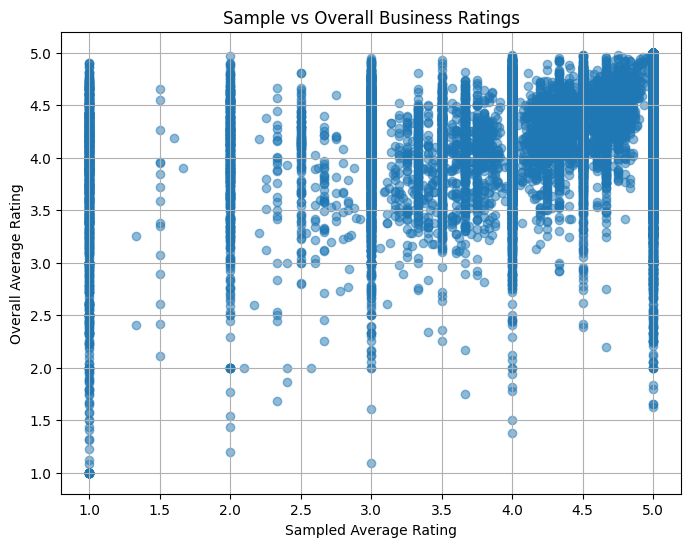

In [ ]:
import json
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd

# Constants
FILE_PATH = 'Data/review-Oregon.json'
CSV_PATH = 'Data/final_results.csv'
RESERVOIR_SIZE = 1000  # Target sample size
PROGRESS_INTERVAL = 1000  # Frequency of progress updates


def print_df_info(df, name):
    """Prints basic information about a DataFrame."""
    print(f"\n📊 {name} DataFrame Info:")
    df.head(5)
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("-" * 50)


def stream_sampling(file_path, reservoir_size, progress_interval):
    """Performs reservoir sampling of 1000 unique users and stores their reviews in a DataFrame."""
    data = []  # List to collect valid reviews
    reservoir_users = set()  # Track sampled users
    distinct_users = set()  # Track all distinct users
    line_count = 0
    total_lines = sum(1 for _ in open(file_path, 'r'))  # Get total lines in file
    
    print(f"📂 Total lines in file: {total_lines}")
    
    with open(file_path, 'r') as f:
        for line in f:
            line_count += 1
            try:
                review = json.loads(line)
            except json.JSONDecodeError:
                continue  # Skip malformed lines

            user_id = review.get('user_id')
            biz_id = review.get('gmap_id')
            rating = review.get('rating')
            if not user_id or not biz_id or rating is None:
                continue  # Skip invalid entries

            distinct_users.add(user_id)
            
            if user_id in reservoir_users:
                data.append((user_id, biz_id, rating))
            else:
                if len(reservoir_users) < reservoir_size:
                    reservoir_users.add(user_id)
                    data.append((user_id, biz_id, rating))
                else:
                    r = random.randint(0, len(distinct_users) - 1)
                    if r < reservoir_size:
                        removed_user = random.choice(list(reservoir_users))
                        reservoir_users.remove(removed_user)
                        reservoir_users.add(user_id)
                        data.append((user_id, biz_id, rating))
            
            # Dynamic progress update
            if line_count % progress_interval == 0:
                distinct_users_pct = (len(distinct_users) / line_count) * 100 if line_count > 0 else 0
                lines_pct = (line_count / total_lines) * 100
                sampled_users_pct = (len(reservoir_users) / RESERVOIR_SIZE) * 100
                
                sys.stdout.write(f"\r⌛ Processed {line_count}/{total_lines} lines ({lines_pct:.2f}%), "
                                 f"Distinct Users: {len(distinct_users)}/{line_count} ({distinct_users_pct:.2f}%), "
                                 f"Sampled Users: {len(reservoir_users)}/{RESERVOIR_SIZE} ({sampled_users_pct:.2f}%)")
                sys.stdout.flush()
    
    print("\n✅ Finished processing for sampling.")
    print(f"Total distinct users encountered: {len(distinct_users)}")
    print(f"Final sample size: {len(reservoir_users)}")
    print(f"Total collected reviews: {len(data)}")
    
    distinct_users_df = pd.DataFrame(list(distinct_users), columns=['user_id'])
    reservoir_users_df = pd.DataFrame(list(reservoir_users), columns=['user_id'])
    data_df = pd.DataFrame(data, columns=['user_id', 'gmap_id', 'rating'])
    print_df_info(data_df, "Sampled Reviews")

    return data_df


def compute_sample_avg_ratings(df):
    """Computes average ratings for businesses from the sampled users."""
    avg_df = df.groupby('gmap_id')['rating'].mean().reset_index().rename(columns={'rating': 'sample_avg_rating'})
    print_df_info(avg_df, "Sample Average Ratings")
    return avg_df


def load_overall_business_avg(csv_path):
    """Loads overall business average ratings from CSV as a DataFrame."""
    df = pd.read_csv(csv_path)[['gmap_id', 'avg_rating']]
    print_df_info(df, "Overall Business Ratings")
    return df


def plot_comparison(sample_df, overall_df):
    """Creates a scatter plot comparing sample vs overall business ratings."""
    merged_df = sample_df.merge(overall_df, on='gmap_id', how='inner')
    print_df_info(merged_df, "Merged Ratings for Comparison")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_df['sample_avg_rating'], merged_df['avg_rating'], alpha=0.5)
    plt.xlabel('Sampled Average Rating')
    plt.ylabel('Overall Average Rating')
    plt.title('Sample vs Overall Business Ratings')
    plt.grid(True)
    plt.show()



def main():
    """Main function to execute streaming sampling and comparison plot using DataFrames."""
    sample_df = stream_sampling(FILE_PATH, RESERVOIR_SIZE, PROGRESS_INTERVAL)
    sample_avg_ratings = compute_sample_avg_ratings(sample_df)
    overall_avg_ratings = load_overall_business_avg(CSV_PATH)
    plot_comparison(sample_avg_ratings, overall_avg_ratings)

if __name__ == "__main__":
    main()

# Part 3: Networks


In [ ]:
! pip install python-louvain
! pip install folium

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community as community_louvain
from geopy.distance import geodesic
import folium
import random
from branca.colormap import LinearColormap

## Q1. Exploratory Data Analysis

a. Read the data file `network-table.txt` you created in the the previous Unix question.  
In addition, read the file *meta-Oregon.json*, which contains additional information about each `gmap_id`, such as category, website, and more.  
Display the first five rows of each dataset and explain what is shown and what does the data represents.

**Note:** If you failed to create the correct `network-table.txt` file in the unix part, you can use for this question the file we supply.

b. Read the file `network-table.txt` and plot a histogram showing the number of reviews by each user (`user_id`).
Next, plot a histogram showing the number of unique users reviewing each buisness (`gmap_id`).

c.
  - Display the distribution of buisness categories using the `meta-Oregon` file. For each buisness having multiple categories use only the first `category`. Show only the top 30 categories having the largest number of buisnesses. Highlight all the restaurant cateories  in a different color.  
  - Choose 4 of the top 30 categories and show for each one of them the distribution of `avg_rating` (from the `meta-Oregon` file) for this cateroy.

d. Finally, filter the  the `meta-Oregon` file to include only buisnesses with more than 100 reviews. Use `Folium` to create a map showing the buisnesses with more than 100 reviews as circles, color them by the `avg_rating` between red to green and make their size proportional to the number of reviews (use `radius` = `num_reviews` / 1000).
Using all of these, describe the data and explain its meaning

**Solution**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the data and show the tables ...

explnation...

explnation...

## Q2. Community Detection - The Louvain Algorithm
- Explain the Louvain algorithm in words, provide an example with at least 6 nodes, display it on a plot, and mark the communities that are formed in the example according to the algorithm (you can use the `community_louvain` implementation).

-  Make one change in the divison to communities (move at least one node from one community to another) and show that the resulting division is sub-optimal by comparing the cost function of the two communities. Write explicitly the formulas that you use.

**Solution**


Explaining in words:



In [ ]:
# Code that plot the example of 6 nodes devided into communites

Suggest change and show the impact using the formulas..  



## Q3. Network Preliminary Analysis
Represent the data file 'network_data.txt' you've loaded as an **undirected** graph using the `gmap_id_from` and `gmap_id_to` fields:
Make sure that each undorederd (`gmap_id_from` and `gmap_id_to`) appears only once, and remove self loops.

Next, analyze the network:
- First, print the number nodes and edges in the graph.
- Then, plot the degree distribution and explain what the plot reveals.
- Finally, visualize the entire graph and describe what you observe. Use the default layout of `networkx` draw function.

**Note: the plot might take a while to run..**

**Solution**


In [ ]:
G = nx.Graph()

for _, row in network_df.iterrows():
    G.add_edge(
        # ...
       )


## Q4. Network Community Analysis

- We want to focus on buisnesses with many reviews. Keep only the nodes that have at least 15 edges. Afterward, remove nodes that are not connected to the central part of the network, i.e. the largest connected component.  

You can use the following code to help:  
```
largest_cc = max(nx.connected_components(subgraph), key=len)  
main_component = subgraph.subgraph(largest_cc)  
```

- Next, run the **Louvain algorithm** to divide the buisnesses in the main connected component into communities. Plot the buisnesses colored by their coomunity and describe the results in detail.

- Finally, we want to know whether communities reflect different categories.
— For each community compute the fraction of buisnesses form this community in each of the 30 top cateories from Q1, plus a 31st cateorgy called 'other' for all buisnesses in a different category
- Plot a heatmap showing the community-by-category fractions.
Do you see a relationship between the communities and categories? derive a staitstical test testing the null hypothesis of no such relationship, and report your test results.

**Solution**


## Q5. Geographic Community Analysis
 In this question we will explore whether there is any geographical significance to the communities that were formed.
-  Choose the **five largest communities**. For each one of them, calculate the average latitude and longitude $\text{Lon, Lat}$ of all locations within it.

- Then, compute the Empirical Cumulative Distribution Function (**ECDF**) of the distances from each location to the center of buisnesses in this community. Plot in addition the **ECDF** of the distance to the center for all locations in the entire dataset.
What do the results show? Do you observe geographical clustering of the communities?  

- Next, plot the points of the buisnesses in the largest five communities on a map using the `folium` library, with each community displayed in a different color. What do you observe? Explain in a couple of sentences the results and why they might occur.

**Solution**
